<a href="https://colab.research.google.com/github/AylinNaebzadeh/Complex-Dynamic-Network/blob/main/Assignment_2_Dormitory_Friendship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import networkx as nx
import pylab as plt
import statistics
from itertools import chain
from collections import Counter
from operator import itemgetter
import pickle
import json

In [2]:
G = nx.Graph()

In [5]:
G.add_node("Aylin")
G.add_node("Zahra.F.M")
G.add_node("Narges")
G.add_node("Zeynab")
G.add_node("Mahboobeh")
G.add_node("PMR")
G.add_node("Setareh")
G.add_node("Melika")
G.add_node("Maryam.J")
G.add_node("Niayesh")

In [6]:
G.add_edge("Aylin", "Narges")
G.add_edge("Aylin", "Zahra.F.M")
G.add_edge("Zahra.F.M", "Mahboobeh")
G.add_edge("Narges", "Zeynab")
G.add_edge("Aylin", "Mahboobeh")

G.add_edge("Aylin", "PMR")
G.add_edge("PMR", "Setareh")
G.add_edge("PMR", "Melika")
G.add_edge("PMR", "Maryam.J")
G.add_edge("PMR", "Niayesh")
G.add_edge("Setareh", "Melika")


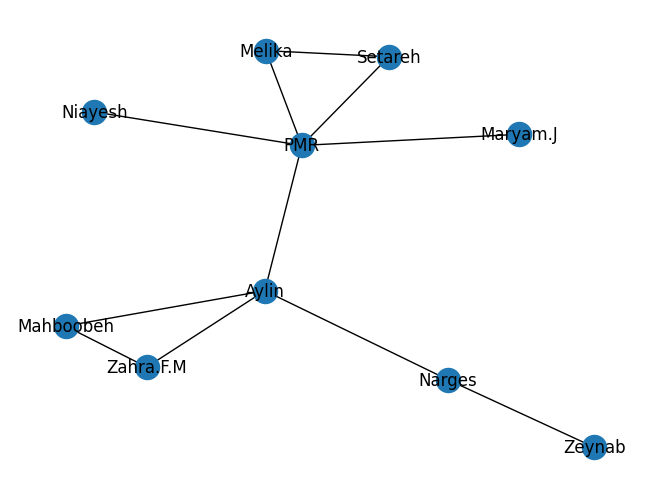

In [7]:
nx.draw(G, with_labels = True)
plt.savefig('dormitory-friendship.png')

In [8]:
number_of_nodes = G.number_of_nodes()
number_of_edges = G.number_of_edges()
print(f"The number of nodes in the graph is: {number_of_nodes}")
print(f"The number of edges in the graph is: {number_of_edges}")

The number of nodes in the graph is: 10
The number of edges in the graph is: 11


In [9]:
degrees = G.degree()
degree_values = [v for k, v in degrees]
sum_of_edges = sum(degree_values)

# Calculating the average is just a matter of division by the number of nodes.
average_degree = sum_of_edges / float(number_of_nodes)
print(f"The average degree in the graph is: {average_degree}")

The average degree in the graph is: 2.2


In [10]:
graph_density = nx.density(G)
print(f"The density of the graph is: {graph_density}")

The density of the graph is: 0.24444444444444444


In [11]:
"""
  Transitiity is a global metric for the network.

      Σ(triangles centered at node i)
  C = ----------------------------------
      Σ(triples centered at node i)
"""
graph_transitivity = nx.transitivity(G)
print(f"The transitivity of the graph is: {graph_transitivity}")

The transitivity of the graph is: 0.2857142857142857


In [12]:
"""
          triangles centered at node i           1
  C(i) = -------------------------------,  C = ----- Σ(i)C(i)
          triples centered at node i             N
        
"""
average_clustering = nx.average_clustering(G)
print(f"The average clustering value of the graph is: {average_clustering}")

The average clustering value of the graph is: 0.42666666666666675


In [14]:
network_diameter = nx.diameter(G)
print(f"The diameter in the graph is: {network_diameter}")

The diameter in the graph is: 4


In [16]:
path_lengths = (y.values() for (x, y) in nx.shortest_path_length(G))
average_shortest_path_length = statistics.mean(chain.from_iterable(path_lengths))
print(f"The average shortest path length of the graph is: {average_shortest_path_length}")

The average shortest path length of the graph is: 2.04


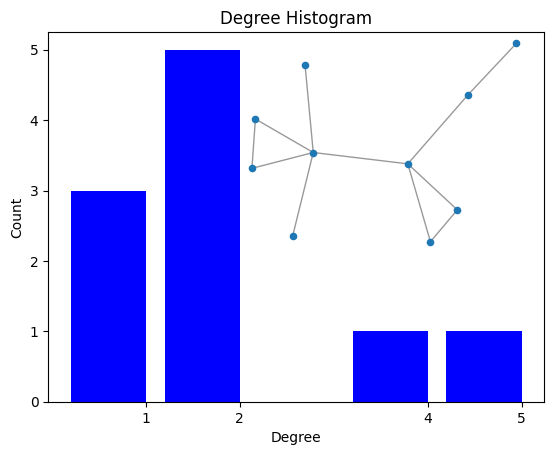

In [21]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
# Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[0]
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()

In [22]:
r = nx.degree_pearson_correlation_coefficient(G)
print(f"The assortiativity value in the graph is: {r}")

The assortiativity value in the graph is: -0.3968253968253968


In [23]:
deg_centrality_dict = nx.degree_centrality(G)
  
c = Counter(deg_centrality_dict)
top_5_nodes_based_on_degree_centrality = c.most_common(5)

print(f"The top five nodes with highest values in degree centrality measurment are: {top_5_nodes_based_on_degree_centrality}")
     

The top five nodes with highest values in degree centrality measurment are: [('PMR', 0.5555555555555556), ('Aylin', 0.4444444444444444), ('Zahra.F.M', 0.2222222222222222), ('Narges', 0.2222222222222222), ('Mahboobeh', 0.2222222222222222)]


In [24]:
closeness_centrality_dict = nx.closeness_centrality(G)

c = Counter(closeness_centrality_dict)
top_5_nodes_based_on_closeness_centrality = c.most_common(5)

print(f"The top five nodes with highest values in closeness centrality measurment are: {top_5_nodes_based_on_closeness_centrality}")

The top five nodes with highest values in closeness centrality measurment are: [('Aylin', 0.6428571428571429), ('PMR', 0.6428571428571429), ('Narges', 0.45), ('Zahra.F.M', 0.42857142857142855), ('Mahboobeh', 0.42857142857142855)]


In [25]:
betweenness_centrality_dict = nx.betweenness_centrality(G, normalized = True, endpoints = False)

c = Counter(betweenness_centrality_dict)
top_5_nodes_based_on_bet_centrality = c.most_common(5)

print(f"The top five nodes with highest values in betweenness centrality measurment are: {top_5_nodes_based_on_bet_centrality}")

The top five nodes with highest values in betweenness centrality measurment are: [('PMR', 0.6944444444444444), ('Aylin', 0.6666666666666666), ('Narges', 0.2222222222222222), ('Zahra.F.M', 0.0), ('Zeynab', 0.0)]


In [26]:
N = G.order()
sum_in_degrees = sum(d for n, d in G.degree())
max_in = max(d for n, d in G.degree())
centralization = float(N * max_in - sum_in_degrees) / (N - 1) ** 2
print(f"The in degree centralization value of the graph is: {centralization}")

The in degree centralization value of the graph is: 0.345679012345679
